## Section 1 - Setup

### Section 1.1 - Installing software and importing packages

In [19]:
!pip install pandas numpy geopandas seaborn scikit-learn tensor folium matplotlib mapclassify earthengine-api geemap pyarrow

In [20]:
from IPython.core.display import display_webp
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
import geemap
import ee
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

### Section 1.2 - Importing our Dataset

In [21]:
# We are importing the observational data from the ZIP file provided (which contains the shape file) into a GeoDataFrame
gdf_predictors_sp = gpd.read_parquet('../../Costa_Rica_Data/Data Acquisition Output/extracted_gee_data/sp_clean_gee_data.parquet')
gdf_predictors = gpd.read_parquet('../../Costa_Rica_Data/Data Acquisition Output/extracted_gee_data/en_clean_gee_data.parquet')

# These display information about the GeoDataFrame to confirm the contains are what we expected
display(gdf_predictors_sp.columns)
display(gdf_predictors.columns)

# Confirming that these are GeoDataFrames
display(type(gdf_predictors_sp))
display(type(gdf_predictors))

# Confirming the shape of the GeoDataFrames
display(gdf_predictors_sp.shape)
display(gdf_predictors.shape)

Index(['plotid', 'sampleid', 'Uso', 'Cobertura', 'Vegetacion', 'Herbaceas',
       'Pasto_Arb', 'Cultivo', 'Humedal', 'Terreno', 'Agua', 'Otra_clase',
       'SAF', 'Cambios15_', 'Gana_Perdi', 'geometry', 'BLUE', 'GREEN', 'NIR',
       'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect', 'aspectcos', 'aspectdeg',
       'aspectsin', 'brightness', 'clay_1mMed', 'diff', 'elevation', 'evi',
       'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi', 'ocs_1mMed', 'sand_1mMed',
       'savi', 'silt_1mMed', 'slope', 'topDiv', 'wetness'],
      dtype='object')

Index(['plotid', 'sampleid', 'Use', 'CoverType', 'Vegetations', 'Herbaceous',
       'GrasslandShrub', 'CropsType', 'WetlandArea', 'LandType',
       'WaterBodyType', 'OtherClass', 'SAF', 'Changes_15', 'Gain_Loss',
       'geometry', 'BLUE', 'GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2',
       'aspect', 'aspectcos', 'aspectdeg', 'aspectsin', 'brightness',
       'clay_1mMed', 'diff', 'elevation', 'evi', 'fpar', 'hand30_100', 'lai',
       'mTPI', 'ndvi', 'ocs_1mMed', 'sand_1mMed', 'savi', 'silt_1mMed',
       'slope', 'topDiv', 'wetness', 'Forest_Presence'],
      dtype='object')

geopandas.geodataframe.GeoDataFrame

geopandas.geodataframe.GeoDataFrame

(91917, 44)

(91917, 45)

## Section 3 - Utilizing ML Models

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Import reduced dataframe
reduced_df = pd.read_parquet('../../Costa_Rica_Data/Data Acquisition Output/extracted_gee_data/adam_reduced_data.parquet')

# Split the data into features and target
X = reduced_df.drop('Forest_Presence', axis=1)
y = reduced_df['Forest_Presence']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Absent       0.89      0.76      0.82       214
     Present       1.00      1.00      1.00     18170

    accuracy                           1.00     18384
   macro avg       0.94      0.88      0.91     18384
weighted avg       1.00      1.00      1.00     18384



In [23]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}, index=y_test.index)

# Add a column to indicate whether the prediction was correct
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Subset the correct and incorrect predictions
correct_predictions = results_df[results_df['Correct'] == True]
incorrect_predictions = results_df[results_df['Correct'] == False]

# Print or save the new DataFrames
print("Correct Predictions:")
print(correct_predictions.head())

print("\nIncorrect Predictions:")
print(incorrect_predictions.head())


Correct Predictions:
        Actual Predicted  Correct
31418  Present   Present     True
62615  Present   Present     True
74589  Present   Present     True
14405  Present   Present     True
7884   Present   Present     True

Incorrect Predictions:
       Actual Predicted  Correct
91145  Absent   Present    False
20940  Absent   Present    False
24348  Absent   Present    False
20586  Absent   Present    False
19223  Absent   Present    False


In [24]:
display(gdf_predictors['Vegetations'].unique())
#gdf_predictors = gdf_predictors[~gdf_predictors['Vegetation'].isin(['Not_Applicable'])]
display(gdf_predictors['Vegetations'].unique())

array(['Trees', 'Herbaceous plants', 'Not_Applicable', 'Palms', 'Shrubs',
       'Other vegetation', 'Saran (plastic cover)', 'Plastic'],
      dtype=object)

array(['Trees', 'Herbaceous plants', 'Not_Applicable', 'Palms', 'Shrubs',
       'Other vegetation', 'Saran (plastic cover)', 'Plastic'],
      dtype=object)

In [25]:
display(gdf_predictors.head(5))

,plotid,sampleid,Use,CoverType,Vegetations,Herbaceous,GrasslandShrub,CropsType,WetlandArea,LandType,...,mTPI,ndvi,ocs_1mMed,sand_1mMed,savi,silt_1mMed,slope,topDiv,wetness,Forest_Presence
9,2902,11605,Wetlands,Vegetation,Trees,Not_Applicable,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.799771,68.0,332.15,0.393728,298.85,0.927410,1323.685053,-0.006312,Present
12,2902,11608,Grasslands,Vegetation,Herbaceous plants,Grasses,Mixed Pasture (70-90%),Not_Applicable,Not_Applicable,Not_Applicable,...,8129.0,0.796553,68.0,332.15,0.423713,298.85,2.935819,1323.685053,-0.014932,Present
13,2902,11609,Wetlands,Vegetation,Herbaceous plants,Grasses,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.644415,65.0,340.45,0.380250,304.70,0.944368,1323.685053,-0.001697,Present
15,2902,11611,Grasslands,Vegetation,Herbaceous plants,Grasses,Mixed Pasture (70-90%),Not_Applicable,Not_Applicable,Not_Applicable,...,8129.0,0.784331,68.0,332.15,0.512687,298.85,0.927410,1323.685053,-0.027987,Present
16,2902,11612,Wetlands,Vegetation,Trees,Not_Applicable,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.769357,65.0,340.45,0.360428,304.70,2.645556,1323.685053,-0.009912,Present


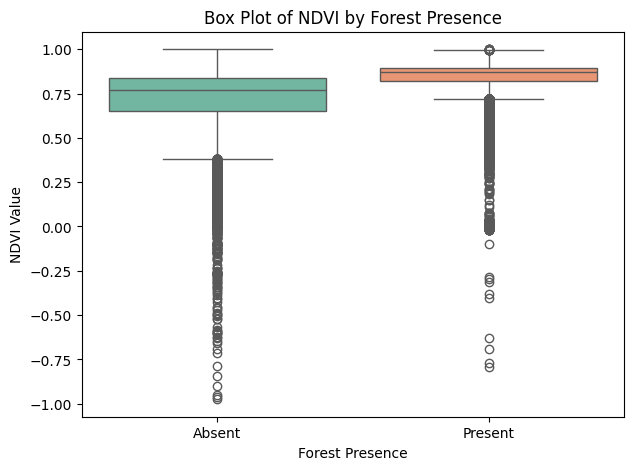

In [29]:
# Create a new column indicating 'Forest Present' or 'Absent'
gdf_predictors['Forest_Presence'] = gdf_predictors['Use'].apply(lambda x: 'Present' if x == 'Forest' else 'Absent')

# Create Boxplot with fixed palette assignment
plt.figure(figsize=(7, 5))
sns.boxplot(x='Forest_Presence', y='ndvi', data=gdf_predictors, hue='Forest_Presence', palette="Set2", legend=False)

# Labels and title
plt.xlabel("Forest Presence")
plt.ylabel("NDVI Value")
plt.title("Box Plot of NDVI by Forest Presence")

# Show plot
plt.show()

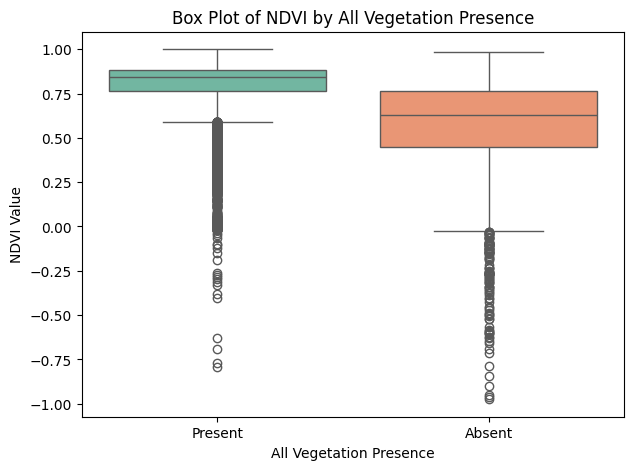

In [27]:
# Create a new column indicating 'Forest Present' or 'Absent'
gdf_predictors['Vegetation_Presence'] = gdf_predictors['Vegetations'].apply(lambda x: 'Present' if x in ['Trees', 'Herbaceous plants', 'Palms', 'Shrubs', 'Other vegetation', 'Saran (plastic cover)', 'Plastic'] else 'Absent')

# Create Boxplot with fixed palette assignment
plt.figure(figsize=(7, 5))
sns.boxplot(x='Vegetation_Presence', y='ndvi', data=gdf_predictors, hue='Vegetation_Presence', palette="Set2", legend=False)

# Labels and title
plt.xlabel("All Vegetation Presence")
plt.ylabel("NDVI Value")
plt.title("Box Plot of NDVI by All Vegetation Presence")

# Show plot
plt.show()